In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import ModelVTS as Model
import TrainerVTS_V05C2 as TP
import DataSetting as DS

In [2]:
datadir = '../dataset/0509/make06-finished/'
print(os.listdir(datadir))

# transform = transforms.ToTensor()
mydata = DS.MyDatasetBBX2(bbx_path = datadir + 'bbx.npy',
                          name = 't_train',
                         csi_path = datadir + 'csi.npy',
                         img_path = datadir + 'c_img.npy',
                         #transform,
                         number=40,
                          random=False,
                         mmap_mode='r'
                        )
mydata.load_data()
myloader = DS.DataSplitter(mydata, train_ratio=0, valid_ratio=0, batch_size=1, shuffle=False)

test_loader = myloader.unsplit_loader()

['csi.npy', 'pd.npy', 'r_img.npy', '.ipynb_checkpoints', 'bbx.npy', 'c_img.npy', 'arr.npy', 'c_img_reshape.npy']
t_train loading...
loaded csi of (10990, 2, 90, 100)
loaded img of (10990, 1, 128, 128)
loaded bbx of (10990, 4)
Exporting...
Exported loader of len 40


In [6]:
# Hyperparameters
torch.cuda.set_device(1)

In [7]:
# Model and Loss
imgencoder = Model.ImageEncoderV05c1(latent_dim=16)
imgdecoder = Model.ImageDecoderV04c2(active_func=nn.ReLU(),latent_dim=16)
csiencoder = None

imgencoder.load_state_dict(torch.load('../saved/240121r1_teacher/240121r1_teacher_ImgEnV05c1_best.pth'))
imgdecoder.load_state_dict(torch.load('../saved/240121r1_teacher/240121r1_teacher_ImgDeV04c2_best.pth'))

trainer = TP.TrainerVTS_V05c2(img_encoder=imgencoder, img_decoder=imgdecoder, csi_encoder=csiencoder, 
                              lr=1e-4, epochs=10, cuda=1,
                              train_loader=None, valid_loader=None, test_loader=test_loader,
                               mode='latent'
                             )
trainer.beta=0.25

In [8]:
  #=====================test============================
trainer.test_teacher(loader='test')

Teacher: test=32/40, loss=461.0206
Test finished. Average loss={'LOSS': 495.002770614624, 'KL': 7.717727315425873, 'RECON': 493.07333221435545}


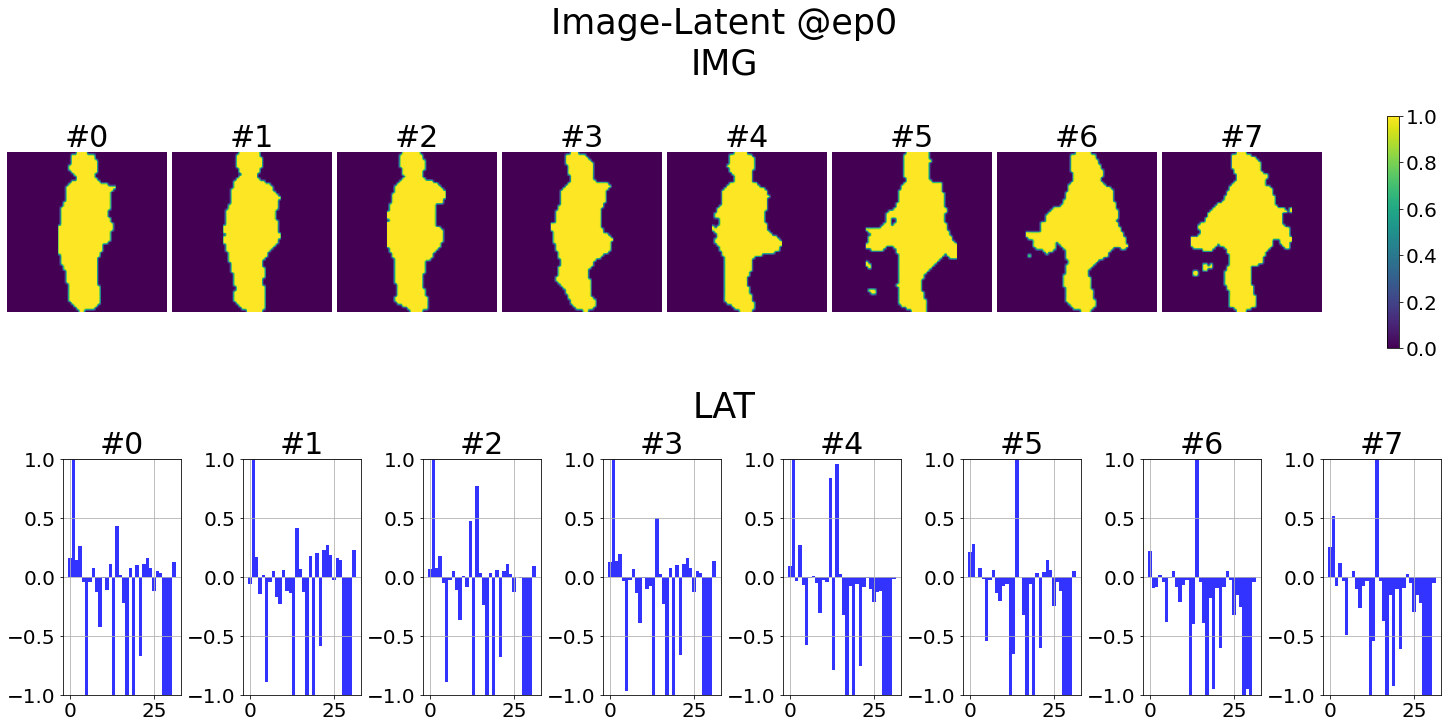

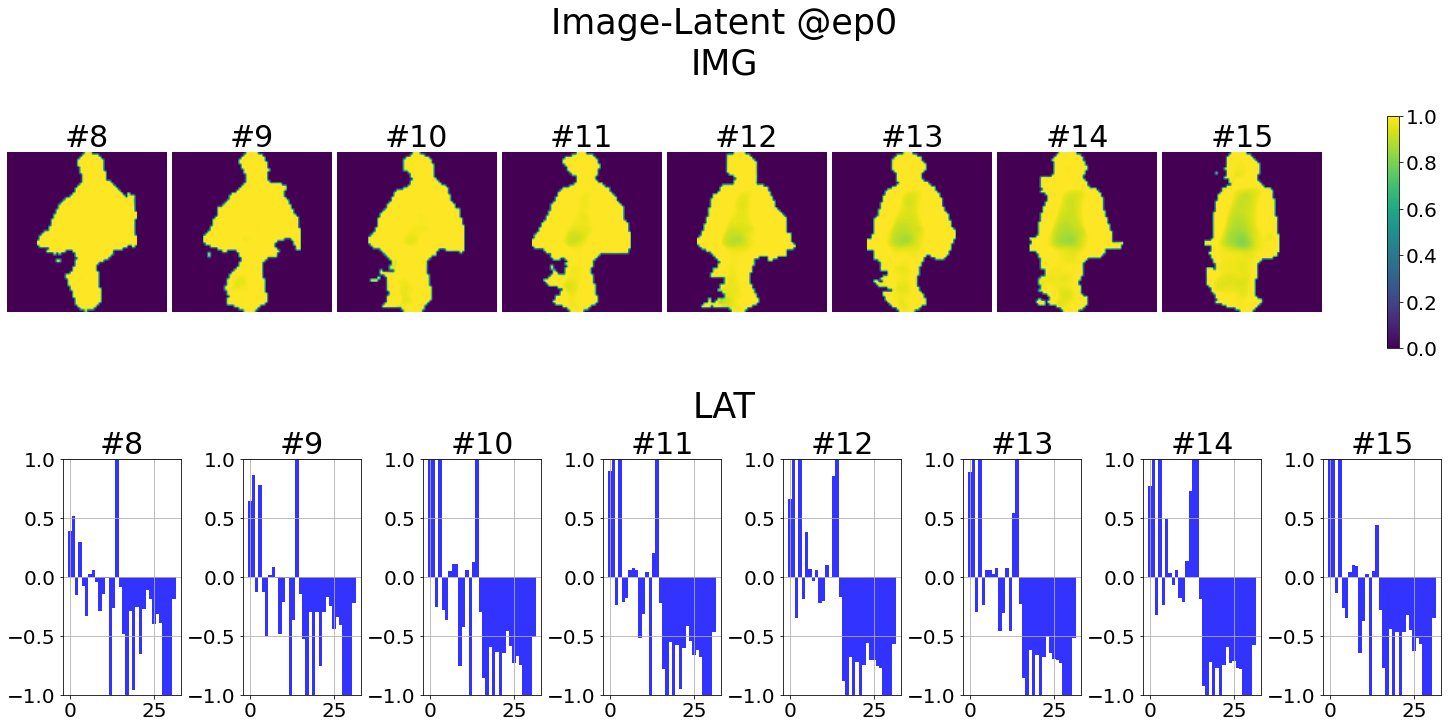

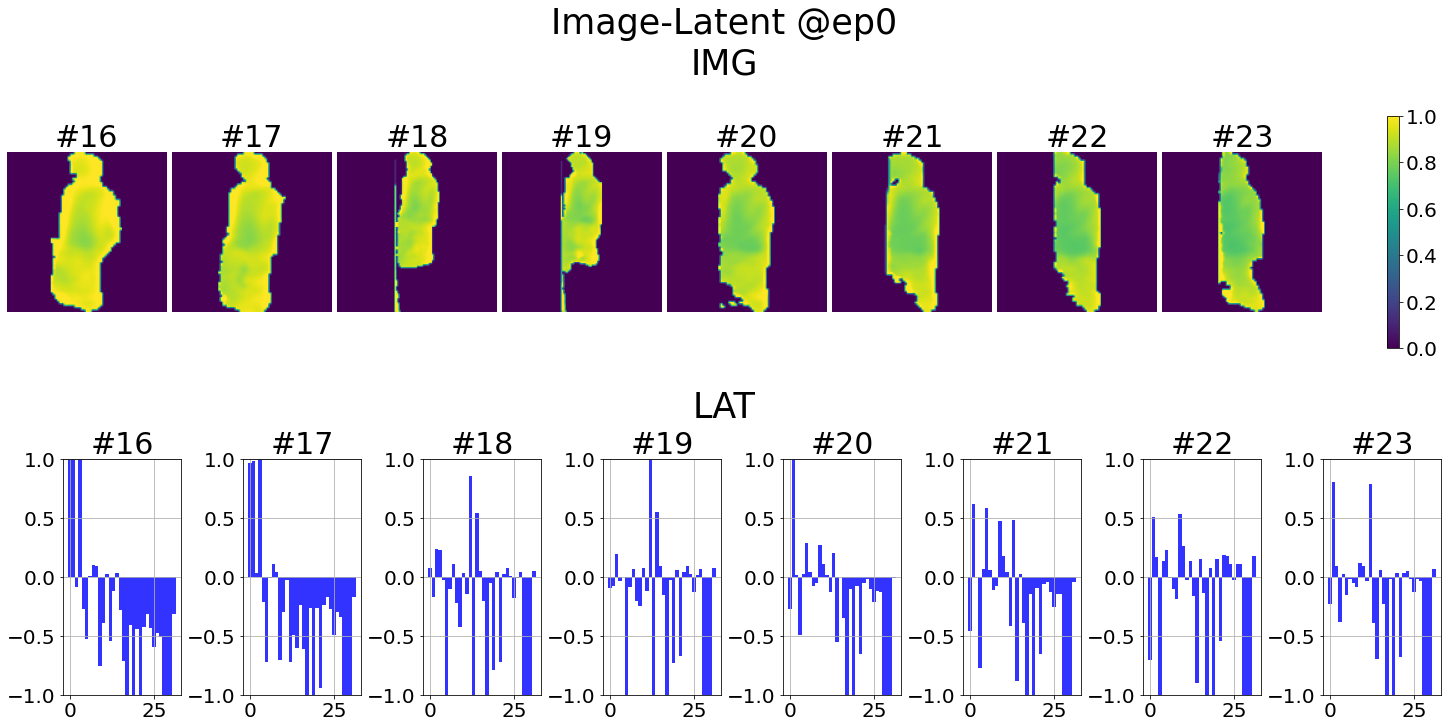

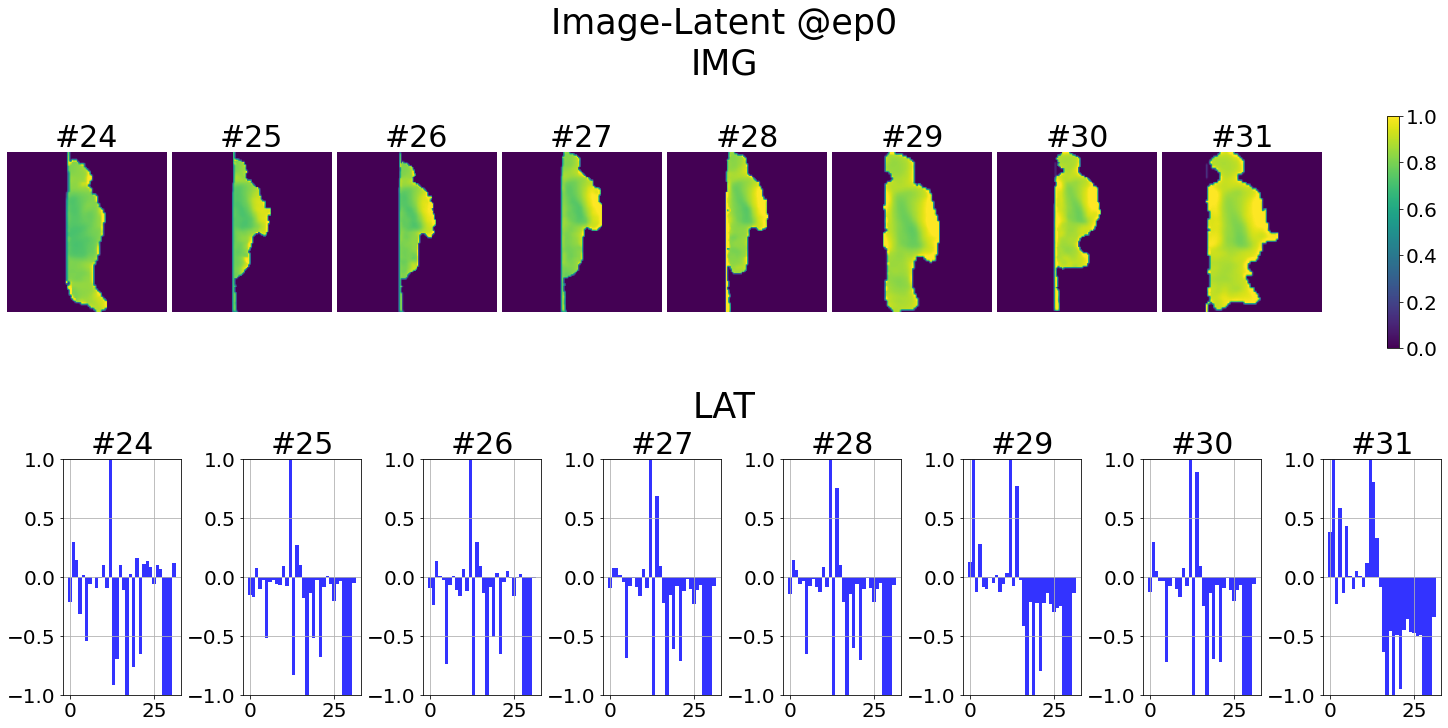

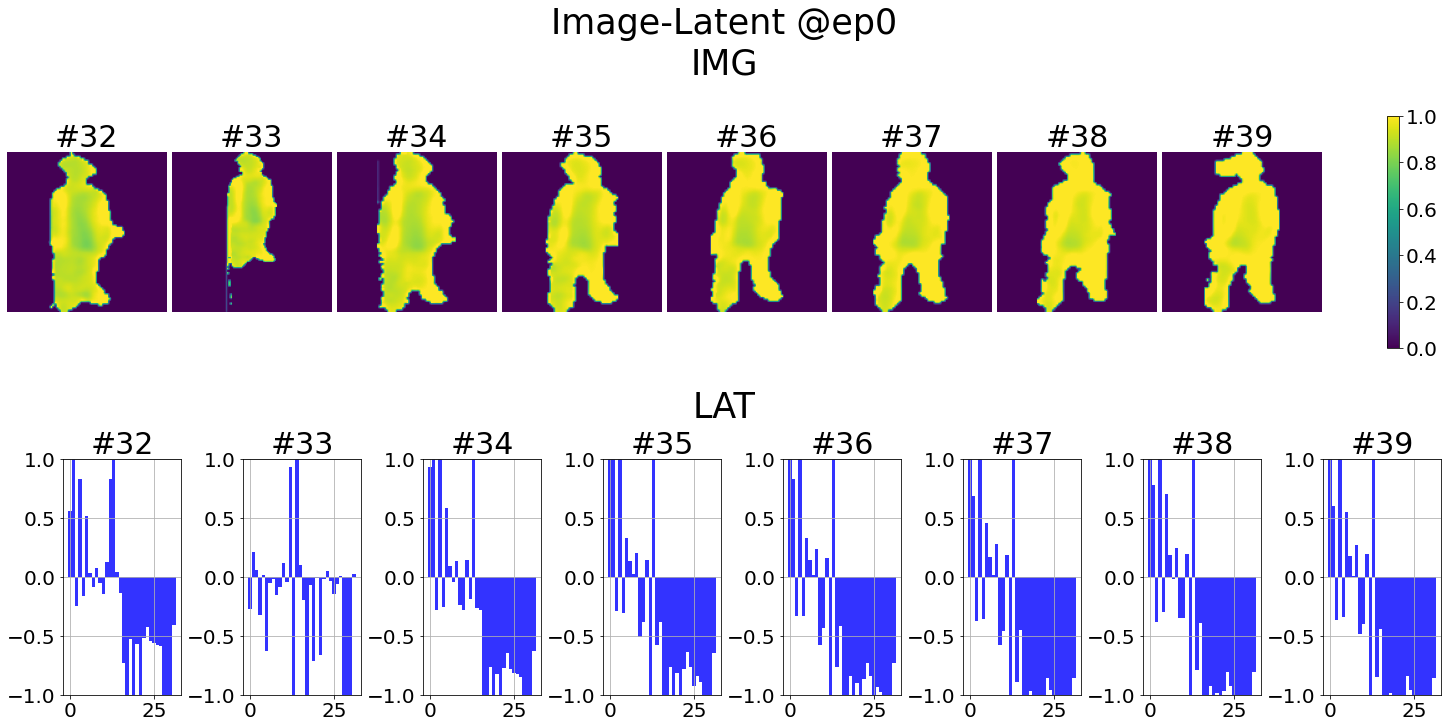

In [9]:
# Final outputs
%matplotlib inline
trainer.inds = list(range(8))
for i in range(5):
    fig = trainer.loss['t'].plot_img_latent(title='Image-Latent', select_ind=list(range(i*8, i*8+8)))